### LinkedIn Learning
### Applied Machine Learning - Ensemble Learning

## Dataset Used : Kaggle's Titanic Dataset

## 1. Read in Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
tit_data = pd.read_csv('train.csv')

In [3]:
tit_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Clean Continuous Variables

### A. Fill in missing Values for Age

In [4]:
tit_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
tit_data['Age'].fillna(tit_data['Age'].mean(), inplace = True)

In [6]:
tit_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


### B. Combine Sibsp and Parch

<Figure size 640x480 with 0 Axes>

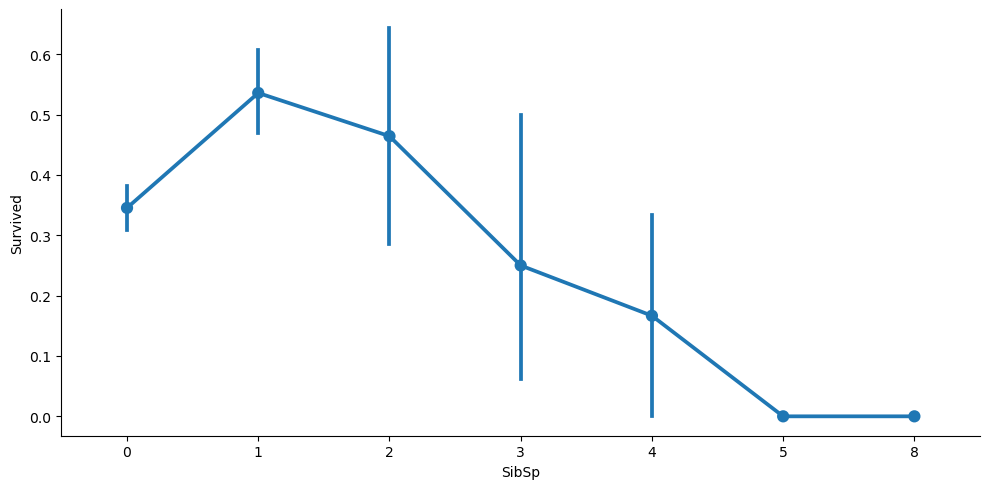

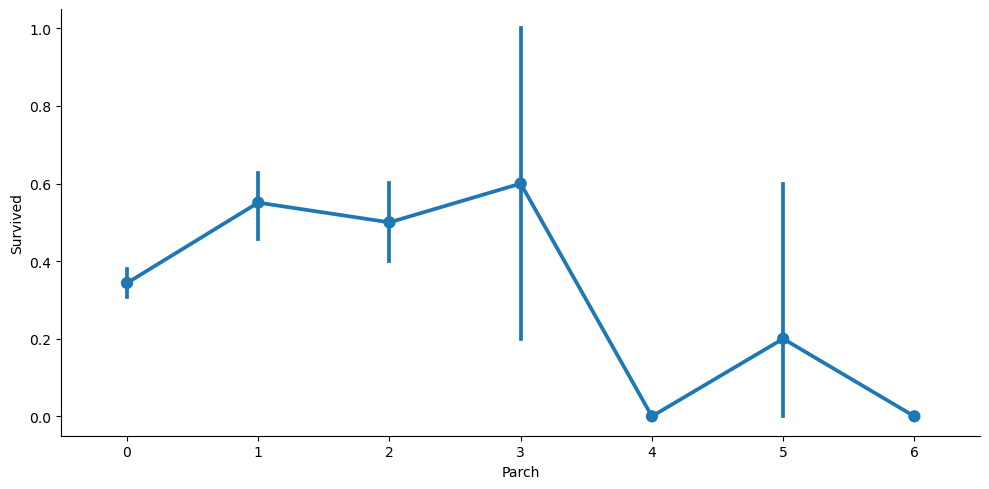

In [7]:
for i, col in enumerate(['SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data = tit_data, kind = 'point', aspect = 2, )

In [8]:
tit_data['Family_cnt'] = tit_data['SibSp'] + tit_data['Parch']

### C. Drop Unnecessary Variables

In [9]:
tit_data.drop(['PassengerId', 'SibSp', 'Parch'], axis = 1, inplace = True)

In [10]:
tit_data.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


## 3. Clean Categorical Features

### A. Fill in missing and create indicator for Cabin

In [11]:
tit_data.isnull().sum ()

Survived        0
Pclass          0
Name            0
Sex             0
Age             0
Ticket          0
Fare            0
Cabin         687
Embarked        2
Family_cnt      0
dtype: int64

In [12]:
tit_data.groupby(tit_data['Cabin'].isnull())['Survived'].mean() 

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [13]:
tit_data['Cabin_ind'] = np.where(tit_data['Cabin'].isnull(), 0, 1)

In [14]:
tit_data.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt,Cabin_ind
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0,0


### B. Convert Sex to numeric

In [15]:
gender_num = {'male' : 0, 'female': 1}

In [16]:
tit_data['Sex'] = tit_data['Sex'].map(gender_num)

In [17]:
tit_data.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt,Cabin_ind
0,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,S,0,0


### C. Drop Unnecessary variables

In [18]:
tit_data.drop(['Cabin', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)

In [19]:
tit_data.head()

,Survived,Pclass,Sex,Age,Fare,Family_cnt,Cabin_ind
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


## 3. Write out Cleaned Data

In [20]:
tit_data.to_csv('train_cleaned.csv')

## 4. Split into Train, Validation and Test set

In [21]:
cleaned_data = pd.read_csv('train_cleaned.csv')

In [22]:
features = cleaned_data.drop('Survived', axis = 1)
labels = cleaned_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.4, random_state = 42)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

In [23]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.6
0.2
0.2


#### Write out all data

In [24]:
X_train.to_csv('train_features.csv', index=False)
X_val.to_csv('val_features.csv', index=False)
X_test.to_csv('test_features.csv', index=False)

y_train.to_csv('train_labels.csv', index=False)
y_val.to_csv('val_labels.csv', index=False)
y_test.to_csv('test_labels.csv', index=False)

## 5. Importing Boosting Algorithms for Classification

In [25]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

GradientBoostingClassifier().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [26]:
AdaBoostClassifier().get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [27]:
import joblib
from sklearn.model_selection import GridSearchCV

In [28]:
tr_features = X_train
tr_labels = y_train

### A. Hyperparameter tuning

In [29]:
def print_results(results):
    print('BEST PARAMS : {}\n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [30]:
gb = GradientBoostingClassifier()

parameters = {
    'n_estimators': [5, 50, 250 ,500],
    'max_depth' : [1, 3, 5, 7, 9],
    'learning_rate' : [0.01, 0.1, 1, 10 , 100]
}

cv = GridSearchCV(gb, parameters, cv = 5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS : {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}

0.624 (+/-0.007) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.796 (+/-0.115) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.796 (+/-0.115) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.811 (+/-0.117) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.624 (+/-0.007) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.811 (+/-0.069) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.824 (+/-0.086) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.826 (+/-0.079) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.624 (+/-0.007) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.809 (+/-0.046) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.822 (+/-0.059) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.816 (+/-0.042) for {'learning

In [31]:
cv.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, n_estimators=500)

### B.Write out pickled model

In [34]:
joblib.dump(cv.best_estimator_, 'GB_model.pkl')

['GB_model.pkl']

## 6. Importing Bagging Algorithms for Classification 

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### A. Hyperparameter tuning

In [37]:
def print_results(results):
    print('BEST PARAMS : {}\n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [40]:
rf = RandomForestClassifier()

parameters = {
    'n_estimators' : [5, 50, 250, 500],
    'max_depth' : [4, 8, 16, 32, None]
}

cv = GridSearchCV(rf,parameters, cv = 5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS : {'max_depth': 8, 'n_estimators': 250}

0.792 (+/-0.098) for {'max_depth': 4, 'n_estimators': 5}
0.807 (+/-0.113) for {'max_depth': 4, 'n_estimators': 50}
0.815 (+/-0.115) for {'max_depth': 4, 'n_estimators': 250}
0.815 (+/-0.119) for {'max_depth': 4, 'n_estimators': 500}
0.796 (+/-0.123) for {'max_depth': 8, 'n_estimators': 5}
0.809 (+/-0.09) for {'max_depth': 8, 'n_estimators': 50}
0.822 (+/-0.086) for {'max_depth': 8, 'n_estimators': 250}
0.813 (+/-0.089) for {'max_depth': 8, 'n_estimators': 500}
0.796 (+/-0.096) for {'max_depth': 16, 'n_estimators': 5}
0.805 (+/-0.072) for {'max_depth': 16, 'n_estimators': 50}
0.815 (+/-0.066) for {'max_depth': 16, 'n_estimators': 250}
0.818 (+/-0.08) for {'max_depth': 16, 'n_estimators': 500}
0.8 (+/-0.063) for {'max_depth': 32, 'n_estimators': 5}
0.805 (+/-0.087) for {'max_depth': 32, 'n_estimators': 50}
0.809 (+/-0.073) for {'max_depth': 32, 'n_estimators': 250}
0.811 (+/-0.068) for {'max_depth': 32, 'n_estimators': 500}
0.792 (+/-0

In [41]:
cv.best_estimator_

RandomForestClassifier(max_depth=8, n_estimators=250)

### B. Write out pickled model

In [42]:
joblib.dump(cv.best_estimator_, 'RF_model.pkl')

['RF_model.pkl']

### 7. Importing Stacking Algorithms for Classification

In [44]:
from sklearn.ensemble import StackingClassifier

In [47]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

In [48]:
estimators = [('gb',GradientBoostingClassifier()), ('rf',RandomForestClassifier())]

In [49]:
StackingClassifier(estimators = estimators).get_params()

{'cv': None,
 'estimators': [('gb', GradientBoostingClassifier()),
  ('rf', RandomForestClassifier())],
 'final_estimator': None,
 'n_jobs': None,
 'passthrough': False,
 'stack_method': 'auto',
 'verbose': 0,
 'gb': GradientBoostingClassifier(),
 'rf': RandomForestClassifier(),
 'gb__ccp_alpha': 0.0,
 'gb__criterion': 'friedman_mse',
 'gb__init': None,
 'gb__learning_rate': 0.1,
 'gb__loss': 'deviance',
 'gb__max_depth': 3,
 'gb__max_features': None,
 'gb__max_leaf_nodes': None,
 'gb__min_impurity_decrease': 0.0,
 'gb__min_samples_leaf': 1,
 'gb__min_samples_split': 2,
 'gb__min_weight_fraction_leaf': 0.0,
 'gb__n_estimators': 100,
 'gb__n_iter_no_change': None,
 'gb__random_state': None,
 'gb__subsample': 1.0,
 'gb__tol': 0.0001,
 'gb__validation_fraction': 0.1,
 'gb__verbose': 0,
 'gb__warm_start': False,
 'rf__bootstrap': True,
 'rf__ccp_alpha': 0.0,
 'rf__class_weight': None,
 'rf__criterion': 'gini',
 'rf__max_depth': None,
 'rf__max_features': 'auto',
 'rf__max_leaf_nodes': None

In [50]:
from sklearn.linear_model import LogisticRegression

### A. Hyperparameter tuning

In [51]:
def print_results(results):
    print('BEST PARAMS : {}\n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [52]:
estimators = [('gb',GradientBoostingClassifier()), ('rf',RandomForestClassifier())]

sc = StackingClassifier(estimators = estimators)

sc.get_params()

{'cv': None,
 'estimators': [('gb', GradientBoostingClassifier()),
  ('rf', RandomForestClassifier())],
 'final_estimator': None,
 'n_jobs': None,
 'passthrough': False,
 'stack_method': 'auto',
 'verbose': 0,
 'gb': GradientBoostingClassifier(),
 'rf': RandomForestClassifier(),
 'gb__ccp_alpha': 0.0,
 'gb__criterion': 'friedman_mse',
 'gb__init': None,
 'gb__learning_rate': 0.1,
 'gb__loss': 'deviance',
 'gb__max_depth': 3,
 'gb__max_features': None,
 'gb__max_leaf_nodes': None,
 'gb__min_impurity_decrease': 0.0,
 'gb__min_samples_leaf': 1,
 'gb__min_samples_split': 2,
 'gb__min_weight_fraction_leaf': 0.0,
 'gb__n_estimators': 100,
 'gb__n_iter_no_change': None,
 'gb__random_state': None,
 'gb__subsample': 1.0,
 'gb__tol': 0.0001,
 'gb__validation_fraction': 0.1,
 'gb__verbose': 0,
 'gb__warm_start': False,
 'rf__bootstrap': True,
 'rf__ccp_alpha': 0.0,
 'rf__class_weight': None,
 'rf__criterion': 'gini',
 'rf__max_depth': None,
 'rf__max_features': 'auto',
 'rf__max_leaf_nodes': None

In [53]:
parameters = {
    'gb__n_estimators' : [50 , 100],
    'rf__n_estimators' : [50, 100],
    'final_estimator' : [LogisticRegression(C=0.1),
                         LogisticRegression(C=1),
                         LogisticRegression(C=10)],
    'passthrough' : [True, False]
}

cv = GridSearchCV(sc, parameters, cv = 5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

C:\Users\Advait\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Advait\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Advait\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Advait\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Advait\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Advait\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Advait\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Advait\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

BEST PARAMS : {'final_estimator': LogisticRegression(C=1), 'gb__n_estimators': 100, 'passthrough': False, 'rf__n_estimators': 50}

0.818 (+/-0.134) for {'final_estimator': LogisticRegression(C=0.1), 'gb__n_estimators': 50, 'passthrough': True, 'rf__n_estimators': 50}
0.817 (+/-0.137) for {'final_estimator': LogisticRegression(C=0.1), 'gb__n_estimators': 50, 'passthrough': True, 'rf__n_estimators': 100}
0.828 (+/-0.06) for {'final_estimator': LogisticRegression(C=0.1), 'gb__n_estimators': 50, 'passthrough': False, 'rf__n_estimators': 50}
0.828 (+/-0.06) for {'final_estimator': LogisticRegression(C=0.1), 'gb__n_estimators': 50, 'passthrough': False, 'rf__n_estimators': 100}
0.822 (+/-0.123) for {'final_estimator': LogisticRegression(C=0.1), 'gb__n_estimators': 100, 'passthrough': True, 'rf__n_estimators': 50}
0.822 (+/-0.122) for {'final_estimator': LogisticRegression(C=0.1), 'gb__n_estimators': 100, 'passthrough': True, 'rf__n_estimators': 100}
0.815 (+/-0.05) for {'final_estimator': Lo

### B. Write out pickled model

In [54]:
joblib.dump(cv.best_estimator_, 'stacked_model.pkl')

['stacked_model.pkl']

### 8. Final: Compare Model results and final model selection

### A. Read in Data

In [55]:
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

val_features = pd.read_csv('val_features.csv')
val_labels = pd.read_csv('val_labels.csv')

te_features = pd.read_csv('test_features.csv')
te_labels = pd.read_csv('test_labels.csv')

### B. Read in Models

In [56]:
gb_mdl = joblib.load('GB_model.pkl')
rf_mdl = joblib.load('RF_model.pkl')
stacked_mdl = joblib.load('stacked_model.pkl')

### C. Evaluate Models on the validation set

In [71]:
def evaluate_model(model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)
    print('\n {} -- Accuracy : {} / Precision : {} / Recall : {} \n/ Latency : {}ms'.format(str(model), accuracy, precision, recall,
                                                                                      round((end-start)*3, 2)))

In [72]:
for mdl in [gb_mdl, rf_mdl, stacked_mdl]:
    evaluate_model(mdl, val_features, val_labels)


 GradientBoostingClassifier(learning_rate=0.01, n_estimators=500) -- Accuracy : 0.809 / Precision : 0.804 / Recall : 0.631 
/ Latency : 0.01ms

 RandomForestClassifier(max_depth=8, n_estimators=250) -- Accuracy : 0.826 / Precision : 0.84 / Recall : 0.646 
/ Latency : 0.13ms

 StackingClassifier(estimators=[('gb', GradientBoostingClassifier()),
                               ('rf', RandomForestClassifier(n_estimators=50))],
                   final_estimator=LogisticRegression(C=1)) -- Accuracy : 0.809 / Precision : 0.816 / Recall : 0.615 
/ Latency : 0.02ms


### C. Evaluating the Best Model on Test Data

In [73]:
evaluate_model(rf_mdl, te_features, te_labels)


 RandomForestClassifier(max_depth=8, n_estimators=250) -- Accuracy : 0.816 / Precision : 0.864 / Recall : 0.671 
/ Latency : 0.13ms
